In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Sales Data - Pivot (FY 16-23).xlsx', sheet_name="FY 22-23")

In [3]:
df.head()

,Year,Month,Month Key,QTR,Region,Invoice Date,Material,Quantity,Gender,Brand,...,Bill to Party Name,MRP,Gross UCP,Net UCP,Bill to Party City,ShiptopartyStateCode,Billing grp,Channel-1,Variant Name,Collection
0,2022-23,2022-04-01,Apr,Q1,South,2022-04-01,NFM03DQ1,4,G,TF,...,CT-BENGALURU-RESIDENCYROAD,499,1996,1996.0,Bangalore,KARNATAKA,LFS,LFS,3. 150 M Amalfi Men deo,g. Premium Deo
1,2022-23,2022-04-01,Apr,Q1,South,2022-04-01,NDFM13PD1,1,G,TF,...,CT-HYDERABAD-G.S.CENTERPOINT,595,595,595.0,Hyderabad,TELANGANA,LFS,LFS,3. 20 M Verge,f. Classic 20 ml
2,2022-23,2022-04-01,Apr,Q1,South,2022-04-01,NFM05DQ1,1,G,TF,...,CT-HYDERABAD-G.S.CENTERPOINT,499,499,499.0,Hyderabad,TELANGANA,LFS,LFS,8. Deo M C. Road 150 ml,g. Escapade Deo
3,2022-23,2022-04-01,Apr,Q1,West,2022-04-01,FW19PC1,1,L,TF,...,CT-MUMBAI-GOREGAON-OBEROIMALL,1595,1595,1595.0,Mumbai,MAHARASTRA,LFS,LFS,3. Tales W Ibiza 100 ml,I. Tales 100ml
4,2022-23,2022-04-01,Apr,Q1,South,2022-04-01,NEFW05PGC,1,L,TF,...,CT-BENGALURU-J.P.NAGAR,2295,2295,2295.0,Bangalore,KARNATAKA,LFS,LFS,7. 100 W Pristine,a. Classic 100 ml


In [5]:
df['Channel-1'].value_counts()

Channel-1
RS       240695
WOT      206832
LFS      196694
Ecom     190278
FTS       17547
SR        15920
Kiosk      5312
KIOSK       138
Name: count, dtype: int64

In [7]:
#To get the data of the LFS from the Channel-2 column from the data with all the columns
df_lfs = df[df['Channel-1'] == 'LFS']

<Axes: xlabel=' Net UCP', ylabel='Count'>

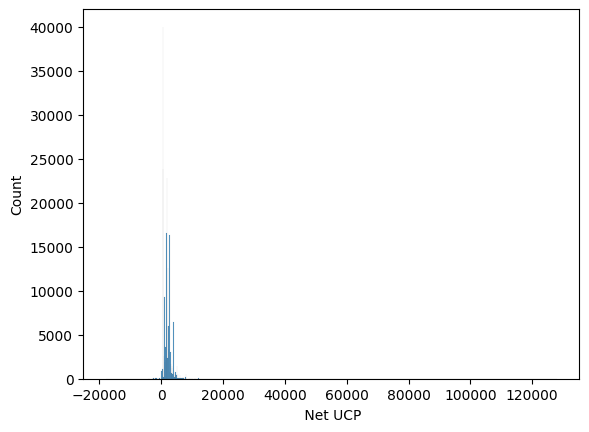

In [8]:
sns.histplot(data=df_lfs, x=' Net UCP', bins=1000)

Column: MRP
Skewness: 0.4128768836009106


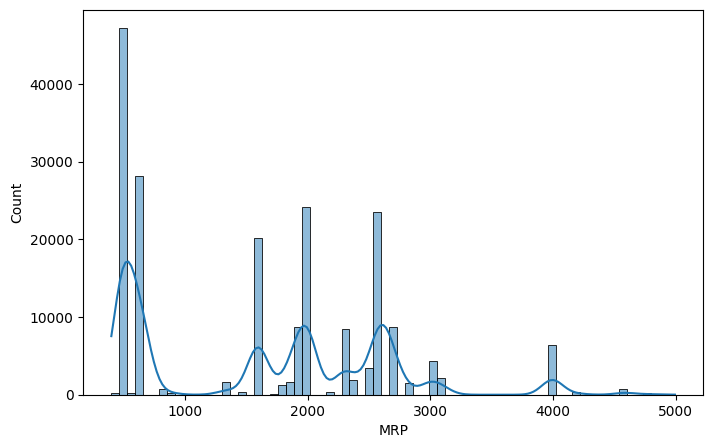

Column: Gross UCP
Skewness: 11.699258162385552


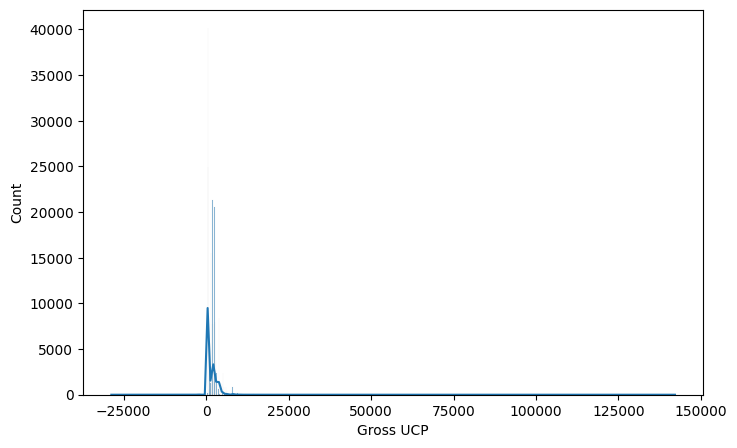

Column:  Net UCP
Skewness: 10.525144206712993


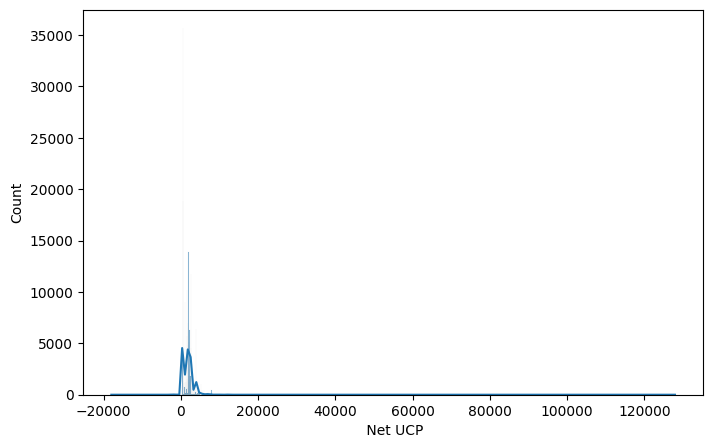

Column: Quantity
Skewness: 36.441829006635565


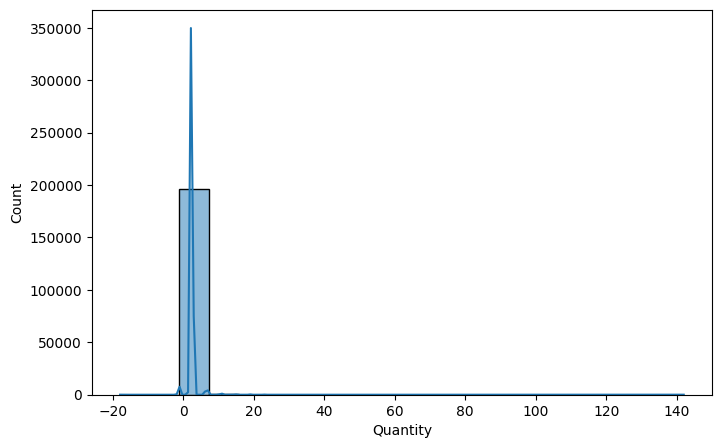

In [9]:
from scipy.stats import skew
columns_to_check = ['MRP', 'Gross UCP', ' Net UCP', 'Quantity']
for col in columns_to_check:
    print(f"Column: {col}")
    print(f"Skewness: {skew(df_lfs[col])}")
    plt.figure(figsize=(8, 5))
    sns.histplot(df_lfs[col], kde=True)
    plt.show()

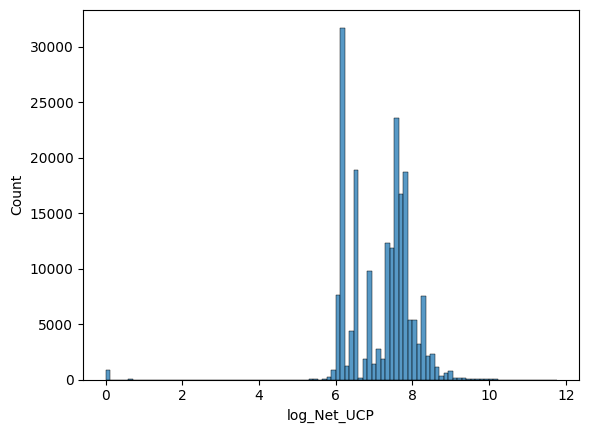

In [10]:
#LOG TRANSFORMATION

df_transformed = df_lfs.copy()

# Apply log transformation (natural logarithm) on the 'Net UCP' column
df_transformed['log_Net_UCP'] = np.log(df_transformed[' Net UCP'] + 1)  # Add 1 to avoid log of zero

# Generate histogram using the transformed column
sns.histplot(data=df_transformed, x='log_Net_UCP', bins=100)

# Display the plot
plt.show()


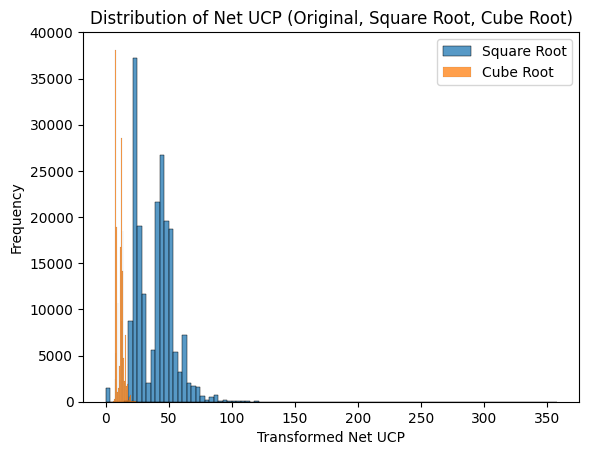

In [11]:
#SQUARE AND CUBE ROOT TRANSFORMATION
import pandas as pd
import seaborn as sns
import numpy as np  # Needed for square root operation

# Assuming 'df_23_24_sales_lfs' is your DataFrame

# Create a copy of the DataFrame for transformations
df_transformed2 = df_transformed.copy()

# Square Root Transformation
# Apply square root on 'Net UCP' (avoiding negative values)
df_transformed2['sqrt_Net_UCP'] = np.sqrt(np.where(df_transformed2[' Net UCP'] >= 0, df_transformed2[' Net UCP'], 0))  

# Generate histogram using square root transformed column
sns.histplot(data=df_transformed2, x='sqrt_Net_UCP', bins=100, label='Square Root')

# Cube Root Transformation
# Apply cube root on 'Net UCP' (avoiding negative values)
df_transformed2['cube_root_Net_UCP'] = np.cbrt(np.where(df_transformed2[' Net UCP'] >= 0, df_transformed2[' Net UCP'], 0))  

# Generate histogram using cube root transformed column
sns.histplot(data=df_transformed2, x='cube_root_Net_UCP', bins=100, label='Cube Root')

# Add labels and title
plt.xlabel('Transformed Net UCP')
plt.ylabel('Frequency')
plt.title('Distribution of Net UCP (Original, Square Root, Cube Root)')
plt.legend()  # Show labels for each histogram

# Display the plot
plt.show()


In [12]:
df_transformed2.head()

,Year,Month,Month Key,QTR,Region,Invoice Date,Material,Quantity,Gender,Brand,...,Net UCP,Bill to Party City,ShiptopartyStateCode,Billing grp,Channel-1,Variant Name,Collection,log_Net_UCP,sqrt_Net_UCP,cube_root_Net_UCP
0,2022-23,2022-04-01,Apr,Q1,South,2022-04-01,NFM03DQ1,4,G,TF,...,1996.0,Bangalore,KARNATAKA,LFS,LFS,3. 150 M Amalfi Men deo,g. Premium Deo,7.599401,44.676616,12.590805
1,2022-23,2022-04-01,Apr,Q1,South,2022-04-01,NDFM13PD1,1,G,TF,...,595.0,Hyderabad,TELANGANA,LFS,LFS,3. 20 M Verge,f. Classic 20 ml,6.390241,24.392622,8.410833
2,2022-23,2022-04-01,Apr,Q1,South,2022-04-01,NFM05DQ1,1,G,TF,...,499.0,Hyderabad,TELANGANA,LFS,LFS,8. Deo M C. Road 150 ml,g. Escapade Deo,6.214608,22.338308,7.931710
3,2022-23,2022-04-01,Apr,Q1,West,2022-04-01,FW19PC1,1,L,TF,...,1595.0,Mumbai,MAHARASTRA,LFS,LFS,3. Tales W Ibiza 100 ml,I. Tales 100ml,7.375256,39.937451,11.683875
4,2022-23,2022-04-01,Apr,Q1,South,2022-04-01,NEFW05PGC,1,L,TF,...,2295.0,Bangalore,KARNATAKA,LFS,LFS,7. 100 W Pristine,a. Classic 100 ml,7.738924,47.906158,13.190489


Column: MRP
Skewness: 0.4075340979975968


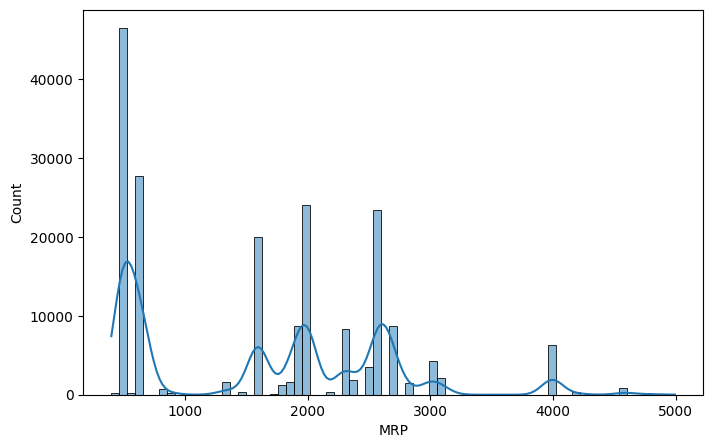

Column: Gross UCP
Skewness: 12.057920661965221


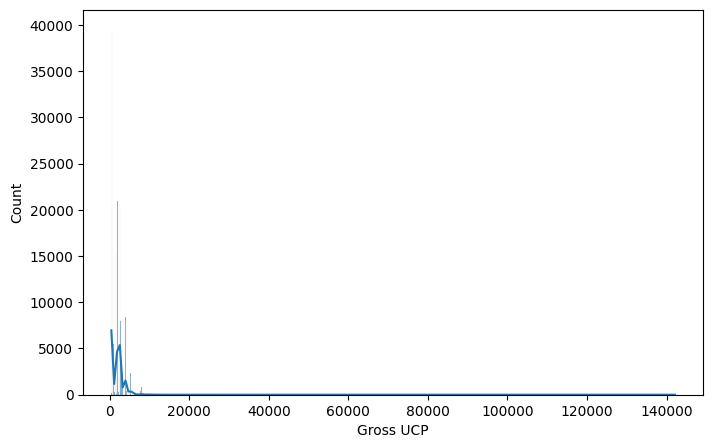

Column:  Net UCP
Skewness: 10.961530796846061


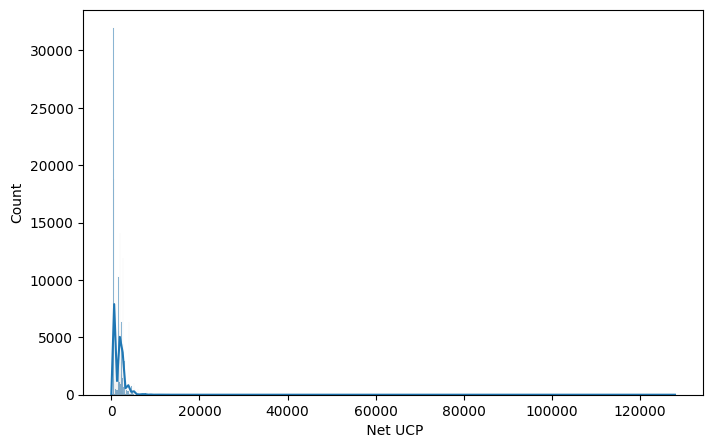

Column: Quantity
Skewness: 37.84651906329863


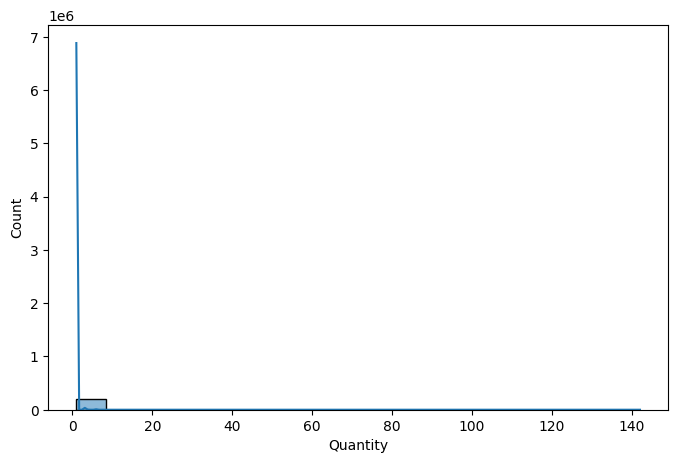

Column: log_Net_UCP
Skewness: -0.12513785418631573


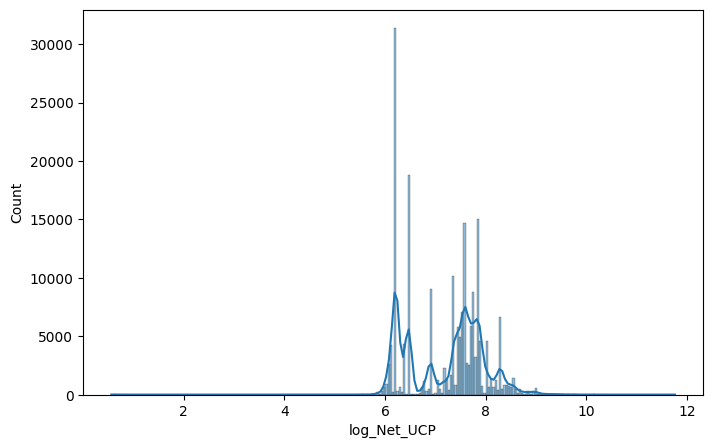

Column: sqrt_Net_UCP
Skewness: 0.9584378672045029


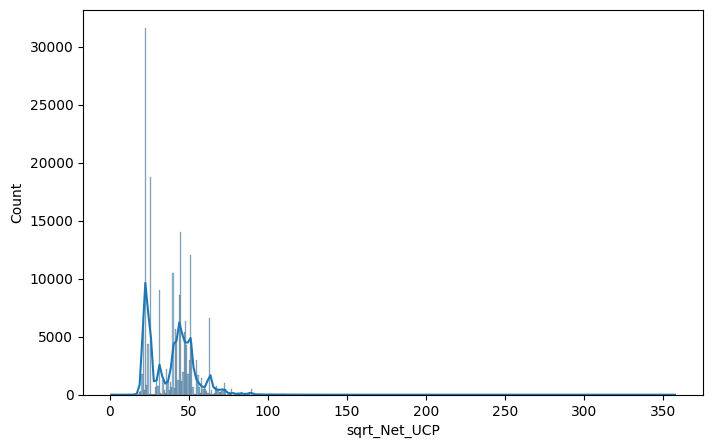

Column: cube_root_Net_UCP
Skewness: 0.46704193259004406


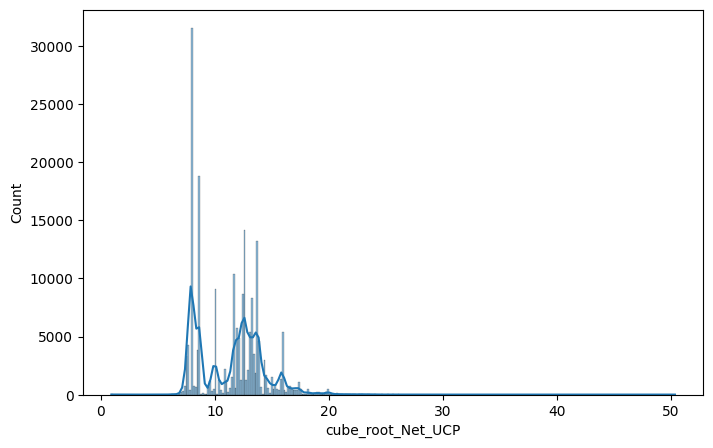

In [17]:
columns_to_check = ['MRP', 'Gross UCP', ' Net UCP', 'Quantity','log_Net_UCP','sqrt_Net_UCP', 'cube_root_Net_UCP']
for col in columns_to_check:
    print(f"Column: {col}")
    print(f"Skewness: {skew(df_transformed2[col])}")
    plt.figure(figsize=(8, 5))
    sns.histplot(df_transformed2[col], kde=True)
    plt.show()

In [14]:
df_transformed2 = df_transformed2[~np.isinf(df_transformed2['log_Net_UCP'])]


In [15]:
(df_transformed2['log_Net_UCP'] == 0).sum()
df_transformed2 = df_transformed2[df_transformed2['log_Net_UCP'] != 0]

In [16]:
df_transformed2 = df_transformed2.dropna(subset=['log_Net_UCP'])